In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


- Load the data:

In [41]:
diseases=pd.read_csv("/kaggle/input/heart-disease-dataset/Dataset Heart Disease.csv")
diseases.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


- data informetion:

In [42]:
rows,columns=diseases.shape
print("the number of samples:",rows)
print("the number of columns:",columns)

the number of samples: 1048

the number of columns: 13


In [43]:
diseases.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1048 entries, 0 to 1047

Data columns (total 13 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   Unnamed: 0           1048 non-null   int64  

 1   age                  1048 non-null   int64  

 2   sex                  1048 non-null   int64  

 3   chest pain type      1048 non-null   int64  

 4   resting bps          1048 non-null   int64  

 5   cholesterol          1048 non-null   float64

 6   fasting blood sugar  1048 non-null   int64  

 7   resting ecg          1048 non-null   int64  

 8   max heart rate       1048 non-null   int64  

 9   exercise angina      1048 non-null   int64  

 10  oldpeak              1048 non-null   float64

 11  ST slope             1048 non-null   int64  

 12  target               1048 non-null   int64  

dtypes: float64(2), int64(11)

memory usage: 106.6 KB


- cleaning the data:

In [44]:
diseases.isnull().sum()

Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [45]:
diseases.duplicated().sum()

0

- columns name:

In [46]:
diseases.columns.tolist()

['Unnamed: 0',
 'age',
 'sex',
 'chest pain type',
 'resting bps',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

- statical information of the data:

In [47]:
diseases.describe()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,390.841603,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,307.916633,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,130.750000,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,262.000000,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,657.250000,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,1189.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


- drop the unneeded column:

In [48]:
diseases.drop('Unnamed: 0',axis=1,inplace=True)
diseases

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,59,1,4,160,273.0,0,0,125,0,0.0,2,0


- EDA of the data
- preprocessing each column of the data and check of the outliers and remove it:

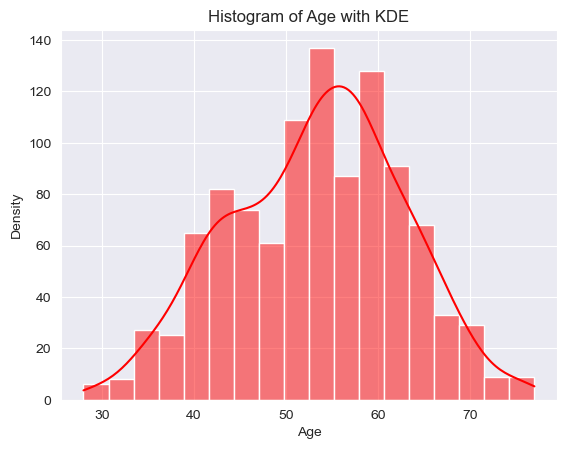

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=diseases['age'], kde=True, color='red')
plt.title('Histogram of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

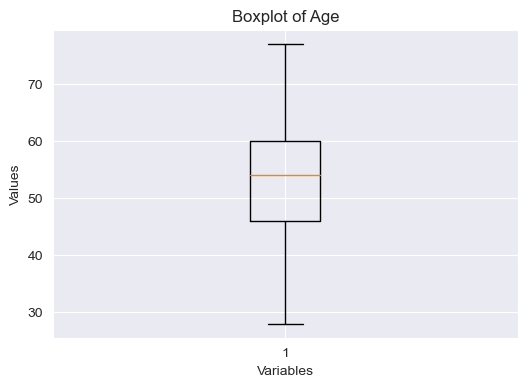

In [50]:
# Creating a boxplot using Matplotlib
plt.figure(figsize=(6, 4))  # Adjust size as needed
plt.boxplot(diseases['age'])
plt.title('Boxplot of Age')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

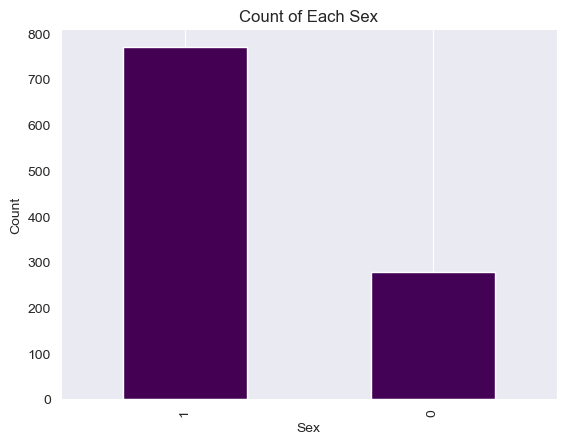

In [51]:
colors = plt.cm.viridis(range(len(diseases['sex'].unique())))

# Plotting bar chart for 'sex' column
diseases['sex'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

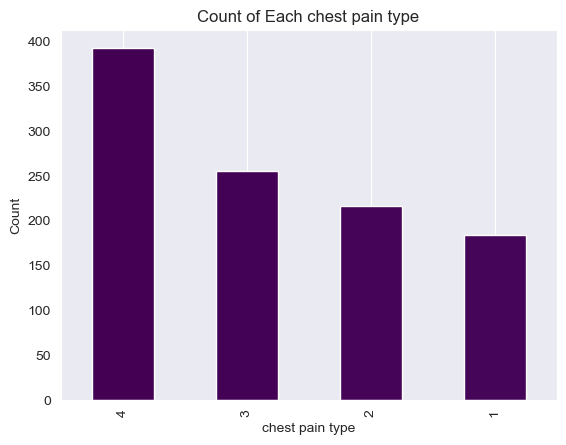

In [52]:
colors = plt.cm.viridis(range(len(diseases['chest pain type'].unique())))

# Plotting bar chart for 'sex' column
diseases['chest pain type'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

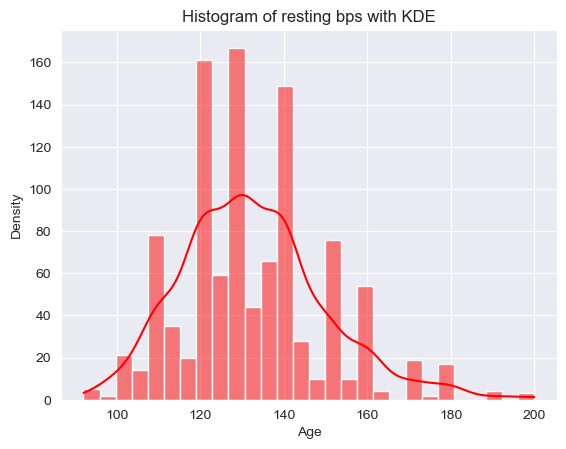

In [53]:
sns.histplot(data=diseases['resting bps'], kde=True, color='red')
plt.title('Histogram of resting bps with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

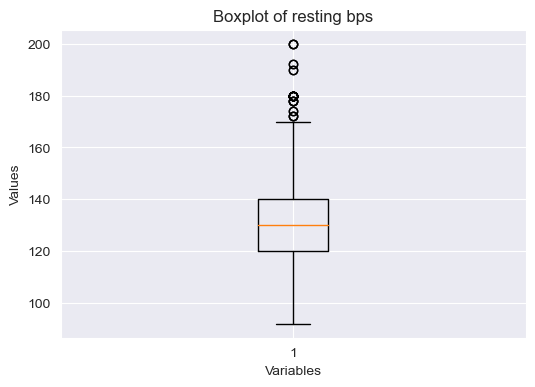

In [54]:
# Creating a boxplot using Matplotlib
plt.figure(figsize=(6, 4))  # Adjust size as needed
plt.boxplot(diseases['resting bps'])
plt.title('Boxplot of resting bps')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

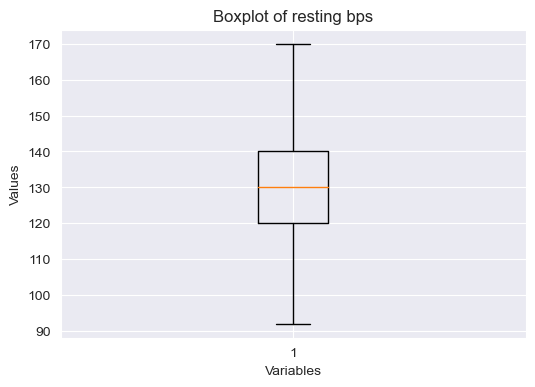

In [55]:
Q1 = diseases['resting bps'].quantile(0.25)
Q3 = diseases['resting bps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
diseases = diseases[(diseases['resting bps'] >= lower_bound) & (diseases['resting bps'] <= upper_bound)]
plt.figure(figsize=(6, 4))
plt.boxplot(diseases['resting bps'])
plt.title('Boxplot of resting bps')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

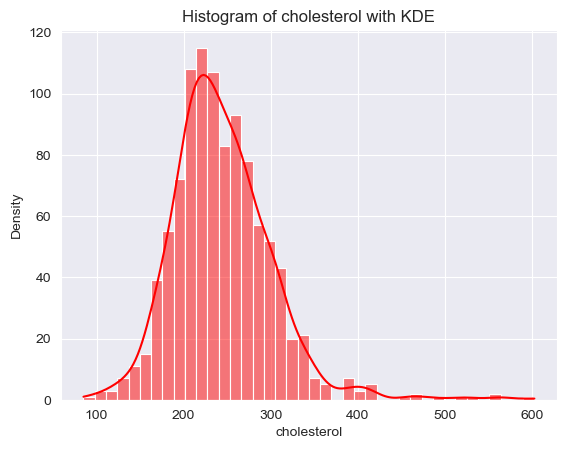

In [56]:
sns.histplot(data=diseases['cholesterol'], kde=True, color='red')
plt.title('Histogram of cholesterol with KDE')
plt.xlabel('cholesterol')
plt.ylabel('Density')
plt.grid(True)
plt.show()

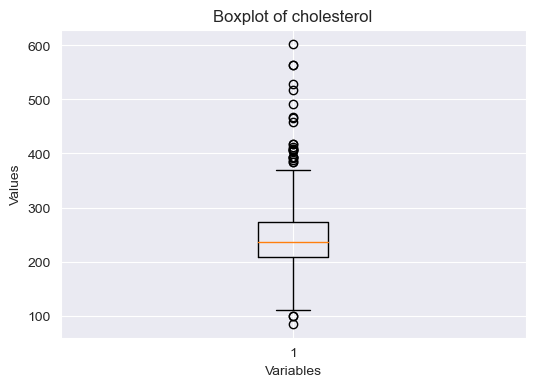

In [57]:
# Creating a boxplot using Matplotlib
plt.figure(figsize=(6, 4))  # Adjust size as needed
plt.boxplot(diseases['cholesterol'])
plt.title('Boxplot of cholesterol')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

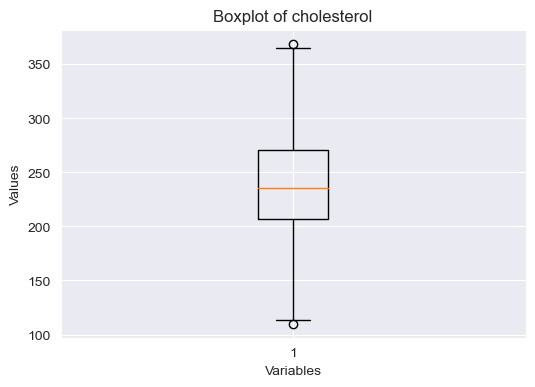

In [58]:
Q1 = diseases['cholesterol'].quantile(0.25)
Q3 = diseases['cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
diseases = diseases[(diseases['cholesterol'] >= lower_bound) & (diseases['cholesterol'] <= upper_bound)]
plt.figure(figsize=(6, 4))
plt.boxplot(diseases['cholesterol'])
plt.title('Boxplot of cholesterol')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

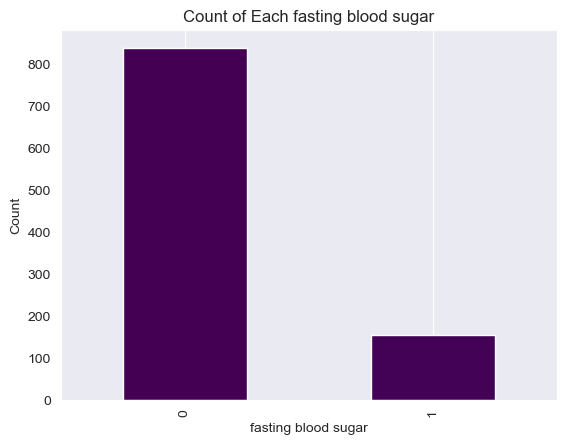

In [59]:
colors = plt.cm.viridis(range(len(diseases['fasting blood sugar'].unique())))

# Plotting bar chart for 'sex' column
diseases['fasting blood sugar'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each fasting blood sugar')
plt.xlabel('fasting blood sugar')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

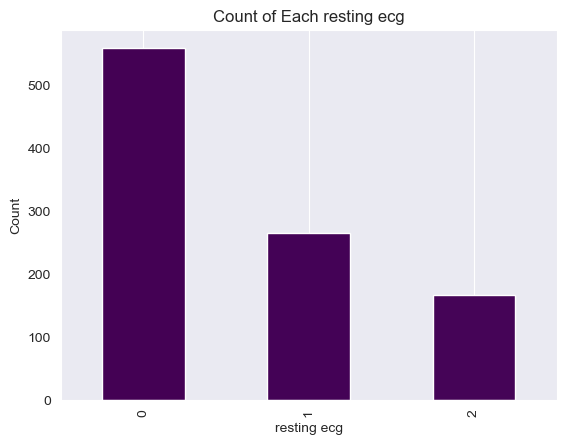

In [60]:

colors = plt.cm.viridis(range(len(diseases['resting ecg'].unique())))

# Plotting bar chart for 'sex' column
diseases['resting ecg'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each resting ecg')
plt.xlabel('resting ecg')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

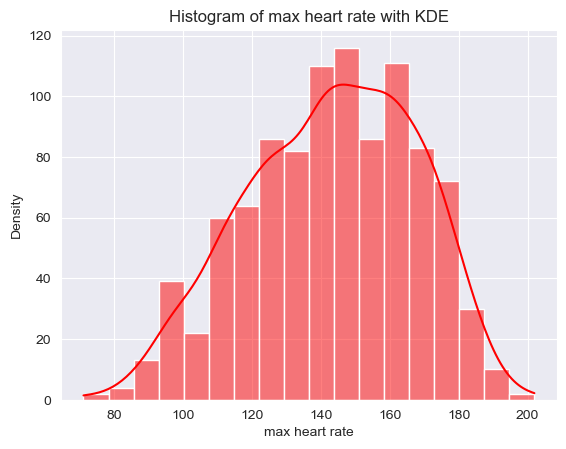

In [61]:

sns.histplot(data=diseases['max heart rate'], kde=True, color='red')
plt.title('Histogram of max heart rate with KDE')
plt.xlabel('max heart rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()

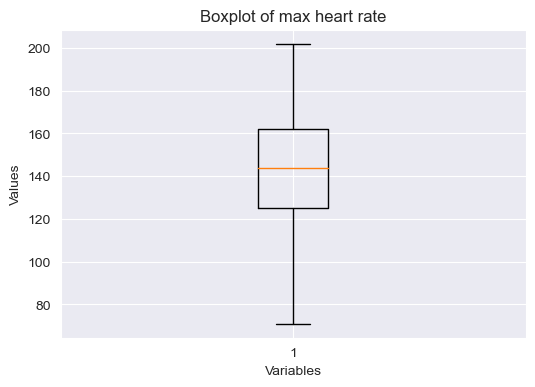

In [62]:
# Creating a boxplot using Matplotlib
plt.figure(figsize=(6, 4))  # Adjust size as needed
plt.boxplot(diseases['max heart rate'])
plt.title('Boxplot of max heart rate')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

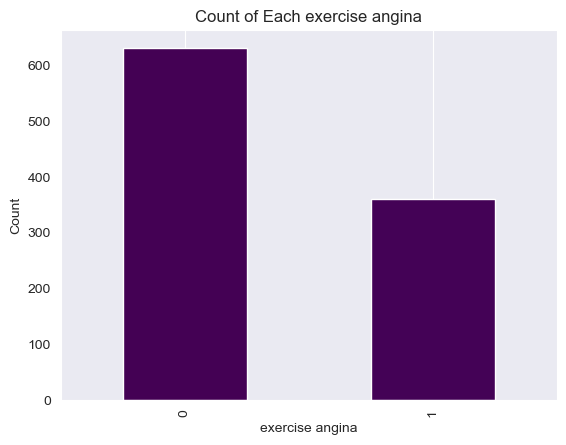

In [63]:
colors = plt.cm.viridis(range(len(diseases['exercise angina'].unique())))
# Plotting bar chart for 'sex' column
diseases['exercise angina'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each exercise angina')
plt.xlabel('exercise angina')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

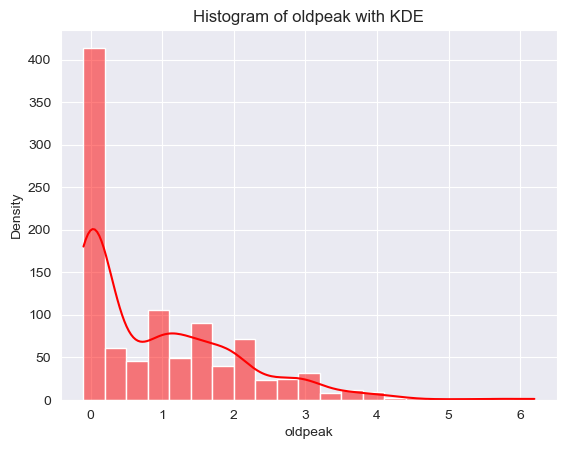

In [64]:
sns.histplot(data=diseases['oldpeak'], kde=True, color='red')
plt.title('Histogram of oldpeak with KDE')
plt.xlabel('oldpeak')
plt.ylabel('Density')
plt.grid(True)
plt.show()

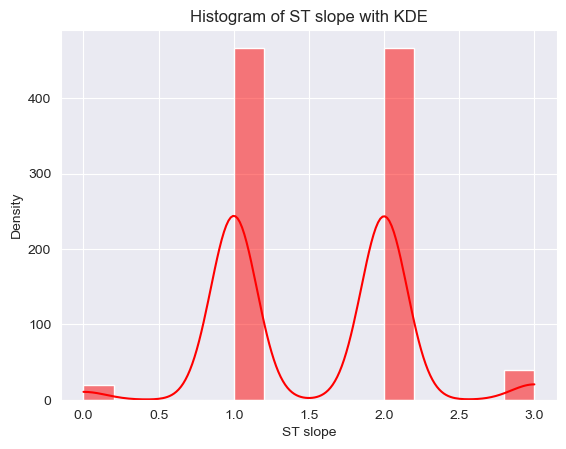

In [65]:
sns.histplot(data=diseases['ST slope'], kde=True, color='red')
plt.title('Histogram of ST slope with KDE')
plt.xlabel('ST slope')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [66]:
diseases.describe()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,53.164315,0.745968,2.806452,131.076613,239.931452,0.154234,0.603831,143.065524,0.362903,0.925706,1.528226,0.493952
std,9.455308,0.435535,1.116268,15.401855,46.881599,0.361355,0.759272,24.450464,0.481080,1.085672,0.607064,0.500216
min,28.000000,0.000000,1.000000,92.000000,110.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,207.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,236.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,271.000000,0.000000,1.000000,162.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,170.000000,369.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [67]:
diseases.info()

<class 'pandas.core.frame.DataFrame'>

Index: 992 entries, 0 to 1047

Data columns (total 12 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   age                  992 non-null    int64  

 1   sex                  992 non-null    int64  

 2   chest pain type      992 non-null    int64  

 3   resting bps          992 non-null    int64  

 4   cholesterol          992 non-null    float64

 5   fasting blood sugar  992 non-null    int64  

 6   resting ecg          992 non-null    int64  

 7   max heart rate       992 non-null    int64  

 8   exercise angina      992 non-null    int64  

 9   oldpeak              992 non-null    float64

 10  ST slope             992 non-null    int64  

 11  target               992 non-null    int64  

dtypes: float64(2), int64(10)

memory usage: 100.8 KB


In [68]:
y=diseases['target']
x=diseases.drop('target',axis=1)


In [69]:
x

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289.0,0,0,172,0,0.0,1
1,49,0,3,160,180.0,0,0,156,0,1.0,2
2,37,1,2,130,283.0,0,1,98,0,0.0,1
3,48,0,4,138,214.0,0,0,108,1,1.5,2
4,54,1,3,150,195.0,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120,211.0,0,0,115,0,1.5,1
1044,44,0,3,108,141.0,0,1,175,0,0.6,1
1045,52,1,1,128,255.0,0,1,161,1,0.0,2
1046,59,1,4,160,273.0,0,0,125,0,0.0,2


- Standardize the data,then
- split the data into train and test:

In [70]:
scaler = StandardScaler()
X = scaler.fit_transform(x)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- bulid the model:
- the model contain 3 hidden layers
- 1 input layer
- 1 output layer
- have dropout for avoid the overfitting

In [72]:
model = Sequential([
    Dense(256, input_shape=(11,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),  
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])


C:\Users\youssef\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# compute the accuracy and test the model:

In [73]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/100

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5915 - loss: 2.9572 - val_accuracy: 0.8000 - val_loss: 2.2989

Epoch 2/100

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 2.1469 - val_accuracy: 0.7625 - val_loss: 1.6812

Epoch 3/100

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 1.5835 - val_accuracy: 0.7875 - val_loss: 1.2701

Epoch 4/100

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7583 - loss: 1.2219 - val_accuracy: 0.7625 - val_loss: 1.0240

Epoch 5/100

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.9973 - val_accuracy: 0.7500 - val_loss: 0.8693

Epoch 6/100

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.8529 - val_accuracy: 0.7625 - val_loss: 0.7881

Epoch 7/100

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7813 - loss: 0.7587 - val_accuracy: 0.7625 - val_loss: 0.7126

Epoch 8/100

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.6919 - val_accu

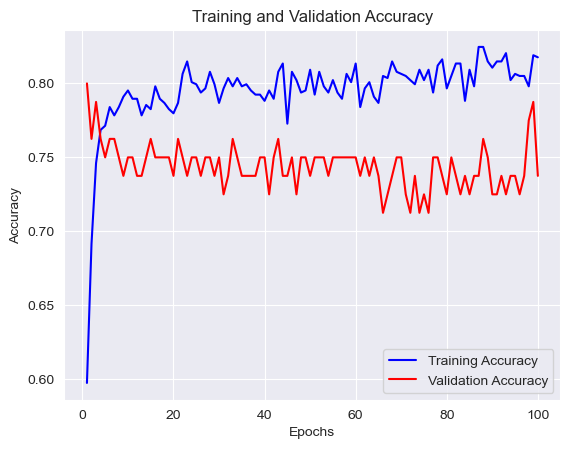

In [74]:

import matplotlib.pyplot as plt

# Train the model and store history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy values
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy:{accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8184 - loss: 0.5739 

Test Loss: 0.6230696439743042, Test Accuracy:0.80402010679245


#compute the confusion matrix:

In [76]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_pred_flat = np.ravel(y_pred)
y_test_flat = np.ravel(y_test)
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)

print("Confusion Matrix:")
print(conf_matrix)




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Confusion Matrix:

[[79 16]

 [23 81]]


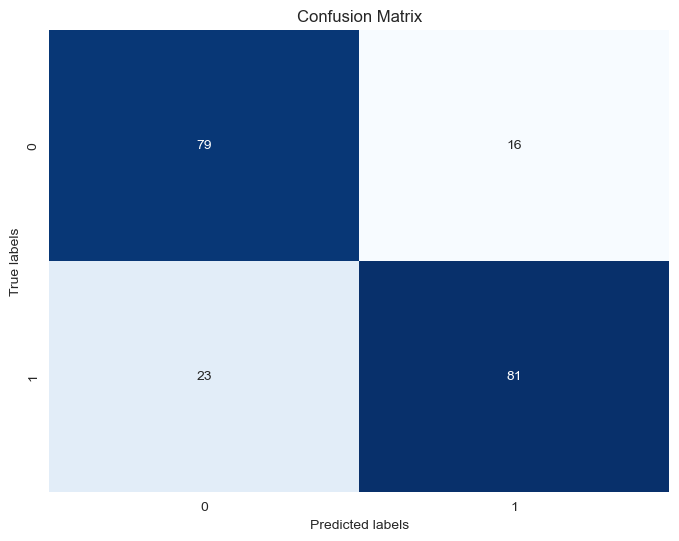

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# show the classification report :

In [78]:
print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat))



Classification Report:

              precision    recall  f1-score   support



           0       0.77      0.83      0.80        95

           1       0.84      0.78      0.81       104



    accuracy                           0.80       199

   macro avg       0.80      0.81      0.80       199

weighted avg       0.81      0.80      0.80       199


## THe End please upvote 